In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1, random_state=8)

In [3]:
X.shape

(1000, 2)

In [4]:
import matplotlib.pyplot as plt

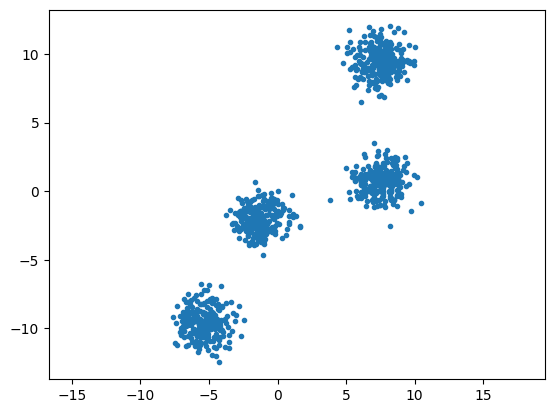

In [5]:
plt.plot(X[:,0], X[:,1], ".")
plt.axis("equal");

In [6]:
from sklearn.cluster import KMeans

k = 3
model = KMeans(n_clusters=k, n_init=100)
model.fit(X)

KMeans(n_clusters=3, n_init=100)

In [7]:
model.cluster_centers_

array([[ 7.43913148,  9.40759528],
       [-3.34774371, -5.81670305],
       [ 7.41714517,  0.70158261]])

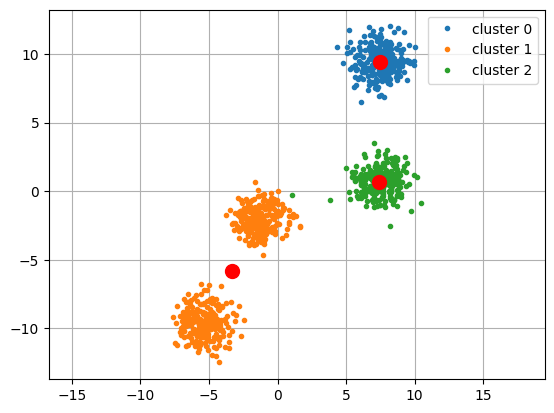

In [8]:
cluster_predicho = model.predict(X)

for cluster in range(model.n_clusters):
    aux = (cluster_predicho == cluster)
    plt.plot(X[aux,0], X[aux,1], ".", label="cluster "+str(cluster))
    plt.plot(model.cluster_centers_[cluster,0],
            model.cluster_centers_[cluster,1], "ro", markersize=10)
plt.legend()
plt.axis("equal")
plt.grid();

# Detección automática de k con el score de Calinski-Harabasz

In [9]:
from sklearn.metrics import calinski_harabasz_score
from tqdm import tqdm

In [10]:
scores = {}
for k in tqdm(range(2,21)):
    model = KMeans(n_clusters=k, n_init=100)
    model.fit(X)
    # labels_ son los clusters asignados a los datos de entrenamiento
    # Equivalente a model.predict(X)
    scores[k] = calinski_harabasz_score(X, model.labels_)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:48<00:00,  2.55s/it]


In [11]:
scores

{2: 2813.3923294852448,
 3: 3002.08026789158,
 4: 12807.572137594425,
 5: 10584.567018256414,
 6: 9386.710816221985,
 7: 8744.890171318613,
 8: 8455.123029684128,
 9: 8156.5717232352235,
 10: 7971.604268551989,
 11: 7990.314341929253,
 12: 8077.754651573878,
 13: 7924.069592667249,
 14: 7816.985917444917,
 15: 7708.185941393573,
 16: 7626.19972142812,
 17: 7545.312783366598,
 18: 7458.452362576786,
 19: 7369.342207778113,
 20: 7327.052007199168}

In [12]:
def myfun(k):
    return scores[k]

In [13]:
max(scores, key=myfun)

4

In [14]:
# De manera equivalente:
max(scores, key=lambda u:scores[u])

4